In [66]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
import visu
import utils

import oscdetector as od

from PIL import Image
reload(visu)

<module 'visu' from '/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py'>

# Single TE: test

## visualization

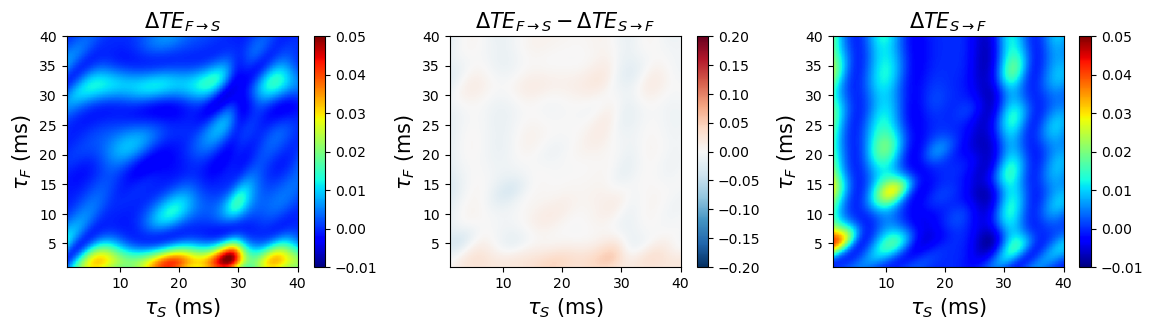

In [400]:
# te_data_2d = utils.load_pickle("./data/te_2d_mua_2/te_405.pkl")
te_data_2d = utils.load_pickle("./data/te_2d_mua_2/te_813.pkl")
fig = visu.show_te_summary_2d(te_data_2d, vmax=0.05, vmin=-.01, vdmax=0.2)

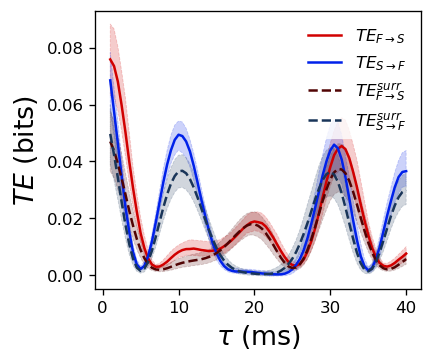

In [1062]:
te_data_2d = utils.load_pickle("./data/te_2d_mua_2/te_813.pkl")
te_data = utils.reduce_te_2d(te_data_2d)

fig = visu.show_te_summary(te_data)

## Stat test

In [1071]:
import stats
reload(stats)

<module 'stats' from '/home/jungyoung/Project/hh_neuralnet/information_routing/stats.py'>

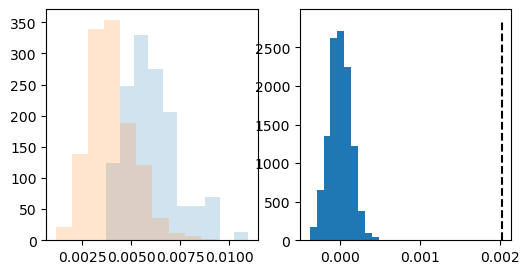

In [1077]:
ntp, nd = 0, 10
x = te_data["te"][:,ntp,nd]
y = te_data["te_surr"][:,ntp,nd]

h = stats.perm_test(x, y, verbose=True)

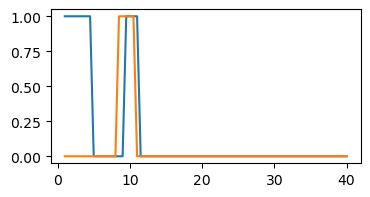

In [1075]:
harr = stats.te_stat_test(te_data, method="conf", alpha=0.05)

plt.figure(figsize=(4, 2))
plt.plot(te_data["tlag"], harr.T)
plt.show()

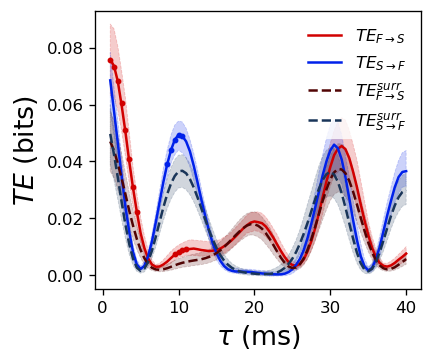

In [1078]:
fig = visu.show_te_summary(te_data, stat_test=True)

## Convert to barcode

In [1090]:
import tebarcode as tb
reload(tb)

<module 'tebarcode' from '/home/jungyoung/Project/hh_neuralnet/information_routing/tebarcode.py'>

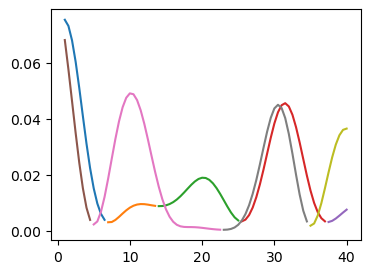

In [1091]:
hinfo = tb.find_te_hill(te_data, verbose=True)

# Generate diagram

In [696]:
import stats
import xarray as xr

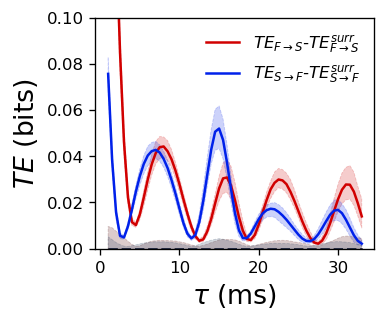

In [1157]:
# cid, wid = 8, 13
cid, wid = 5, 10
# cid, wid = 5, 4
# cid, wid = 4, 2
te_data_2d = utils.load_pickle("./data/te_2d_mua_2/te_%d%02d.pkl"%(cid, wid))
te_data = utils.reduce_te_2d(te_data_2d, tcut=1e3/visu.fpeaks[cid-1][0])

fig = visu.show_te_summary(te_data, yl=[0, 0.1], figsize=(3, 2.5), subtract_surr=True)

In [1158]:
import tebarcode as tb
reload(tb)

binfo = tb.get_barcode(te_data)

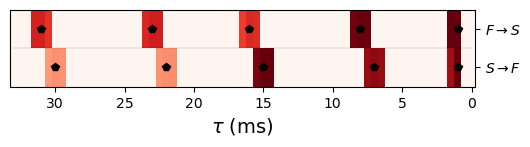

In [1159]:
fig = tb.draw_barcode(binfo)
# fig.gca().set_xlabel(r"$\tau$ (ms)", fontsize=14)
# plt.xlabel(r"$\tau$ (ms)", fontsize=14)
plt.show()

# Compare TE: within same cluster ID

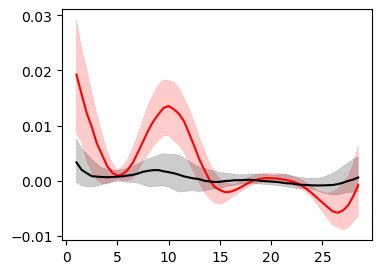

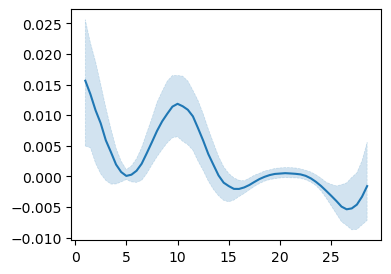

In [1236]:
fdir = "./data/te_2d_mua_2/"
cid, wid = 8, 13

tcut = 1e3/visu.fpeaks[cid-1][0]

te_base = utils.load_pickle(os.path.join(fdir, "te_%d%02d.pkl"%(cid, 0)))
te_base = utils.reduce_te_2d(te_base, tcut=tcut)

te_data = utils.load_pickle(os.path.join(fdir, "te_%d%02d.pkl"%(cid, wid)))
te_data = utils.reduce_te_2d(te_data, tcut=tcut)

ntp = 1
dte_base = te_base["te"][:,ntp,:] - te_base["te_surr"][:,ntp,:].mean(axis=0)
dte_data = te_data["te"][:,ntp,:] - te_data["te_surr"][:,ntp,:].mean(axis=0)

plt.figure(figsize=(4, 3))
t = te_data["tlag"]
visu.draw_with_err(t, dte_data, c='r')
visu.draw_with_err(t, dte_base, c='k')
plt.show()



dte = dte_data - dte_base.mean(axis=0)

plt.figure(figsize=(4, 3))
visu.draw_with_err(t, dte, c='C0')
plt.show()

In [1238]:
from scipy.stats import ttest_ind

In [1246]:
pvals = []
for nd in range(dte_data.shape[-1]):
    res = ttest_ind(dte_data[:,nd], dte_base[:,nd])
    pvals.append(res.pvalue)

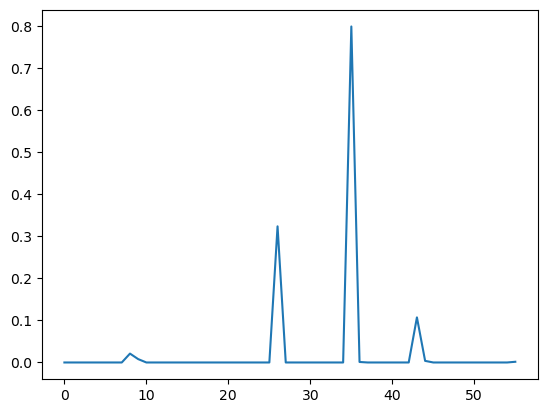

In [1247]:
plt.plot(pvals)

In [1230]:
dte_data = te_data["te"] - te_data["te_surr"].mean(axis=0, keepdims=True)
dte_base = te_base["te"] - te_base["te_surr"].mean(axis=0, keepdims=True)

te_boost = dict(te=dte_data, te_surr=dte_base, tlag=te_data["tlag"])
binfo_boost = tb.get_barcode(te_boost)

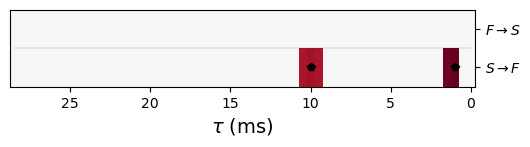

In [1231]:
fig = tb.draw_barcode(binfo_boost, cmap="RdBu_r")
plt.show()

In [1232]:
binfo_boost

{'barcode': array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.01561914, 0.01358077, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0

In [1111]:
binfo.keys()

dict_keys(['barcode', 'tbar', 'bpeaks', 'info'])

TypeError: 'module' object is not subscriptable

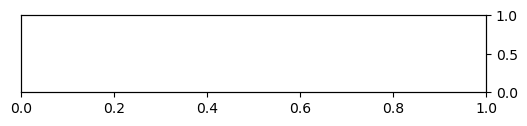

In [1101]:
plt.figure(figsize=(6, 1.))
plt.yticks([])

plt.twinx()
dt = tb[1] - tb[0]
plt.imshow(binfo["barcode"][:,::-1], aspect="auto", cmap="Reds",
          extent=(-tb[-1]-dt/2, dt/2, 0, 1), vmax=bmax)

for ntp in range(2):
    if len(bpeaks[ntp]) == 0: continue
    plt.plot(-tb[bpeaks[ntp]], [0.75-0.5*ntp]*len(bpeaks[ntp]), 'kp')
    
plt.yticks([0.25, 0.75], labels=(r"$S \rightarrow F$", r"$F \rightarrow S$"))
plt.plot([-tb[-1], -tb[0]], [0.5, 0.5], 'k-', lw=0.2, alpha=0.5)

visu.draw_freq_indicator(cid, h=-.15, flip=True)
# visu.draw_cfc_indicator(cid, h=-0.15, flip=True)
visu.draw_syn_indicator(h=-.15, flip=True)
plt.xlim([-tb[-1], 0])

plt.show()

In [1054]:
sig_arr = stats.te_stat_test(te_data, method="conf", alpha=0.05)
hill_info = visu.find_hill(te_data["te"].mean(axis=0))

nw = 3

bpeaks = []
is_bar = np.zeros(te_data["te"].shape[1:], dtype=bool)
for ntp in range(2):
    bpeaks.append([])
    num = len(hill_info['id_set'][ntp])
    for nh in range(num):
        n0 = hill_info["id_peak"][ntp][nh]
        nset = np.arange(n0-nw, n0+nw+1)
        nset = nset[(nset >= 0) & (nset < te_data["te"].shape[-1])]

        if sig_arr[ntp][nset].sum() >= len(nset)-2:
            nset = np.arange(n0-1, n0+2)
            nset = nset[(nset >= 0) & (nset < te_data["te"].shape[-1])]
            is_bar[ntp][nset] = True
            bpeaks[ntp].append(n0)

    bpeaks[ntp] = np.array(bpeaks[ntp])
    
tb = te_data["tlag"]
barcode = np.zeros(te_data["te"].shape[1:]) * np.nan
barcode[is_bar] = te_data["te"].mean(axis=0)[is_bar]

# fill
if tb[0] != 0:

    dt = tb[1] - tb[0]
    nt = int(tb[0]/dt)
    bp = np.zeros([te_data["te"].shape[1], nt]) * np.nan
    
    barcode = np.hstack((bp, barcode))
    tb = np.concatenate((np.arange(0, tb[0], dt), tb))
    
    bpeaks = [b + nt for b in bpeaks]
    
barcode = barcode
barcoe = barcode
bmax = np.percentile(barcode[~np.isnan(barcode)], 75)
barcode[np.isnan(barcode)] = 0

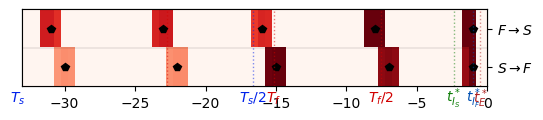

In [1055]:
plt.figure(figsize=(6, 1.))
plt.yticks([])

plt.twinx()
dt = tb[1] - tb[0]
plt.imshow(barcode[:,::-1], aspect="auto", cmap="Reds",
          extent=(-tb[-1]-dt/2, dt/2, 0, 1), vmax=bmax)

for ntp in range(2):
    if len(bpeaks[ntp]) == 0: continue
    plt.plot(-tb[bpeaks[ntp]], [0.75-0.5*ntp]*len(bpeaks[ntp]), 'kp')
    
plt.yticks([0.25, 0.75], labels=(r"$S \rightarrow F$", r"$F \rightarrow S$"))
plt.plot([-tb[-1], -tb[0]], [0.5, 0.5], 'k-', lw=0.2, alpha=0.5)

visu.draw_freq_indicator(cid, h=-.15, flip=True)
# visu.draw_cfc_indicator(cid, h=-0.15, flip=True)
visu.draw_syn_indicator(h=-.15, flip=True)
plt.xlim([-tb[-1], 0])

plt.show()

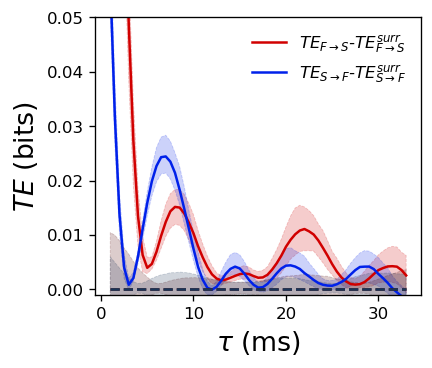

In [1011]:
fig = visu.show_te_summary(te_data, subtract_surr=True, yl=(-0.001, 0.05))

## Generate barcode

In [ ]:
te_barcode = np.zeros((2, len(te_data["tlag"])))
te_barcode[0] = te_data["te"][:,0,:].mean(axis=0)
te_barcode[1] = te_data["te"][:,1,:].mean(axis=0)

In [ ]:
plt.figure(figsize=(5, 1.5))
plt.imshow(te_barcode, cmap="gray", aspect="auto", vmax=0.06, vmin=0.02,
           extent=(te_data["tlag"][0], te_data["tlag"][-1], 0, 1))
# plt.colorbar()
plt.yticks([0.25, 0.75], labels=(r"$S \rightarrow F$", r"$F \rightarrow S$"))
plt.xlabel(r"$\tau_{lag}$ (ms)", fontsize=16)
plt.show()

## stats

In [985]:
from scipy import stats

16.0


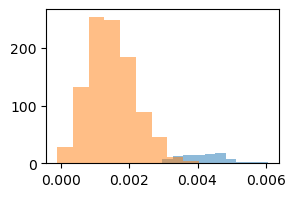

pval: 3.877707506779346e-68


In [986]:
ntp = 0
ntlag = 30
print(te_data["tlag"][ntlag])

xtrue = te_data["te"][:,ntp,ntlag]
xsurr = te_data["te_surr"][:,ntp,ntlag]


plt.figure(figsize=(3, 2))
plt.hist(xtrue, alpha=0.5)
plt.hist(xsurr, alpha=0.5)
# plt.xticks(np.linspace(0.001, 0.012, 5))
# plt.xlim([0.001, 0.012])
plt.show()

res = stats.ttest_ind(xtrue, xsurr, equal_var=False)
print("pval:", res.pvalue)

## confidence interval

In [987]:
bres_true = stats.bootstrap((xtrue,), np.mean, confidence_level=0.9, random_state=42)
bres_surr = stats.bootstrap((xsurr,), np.mean, confidence_level=0.9, random_state=42)

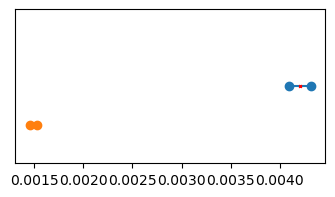

In [988]:
m = xtrue.mean()
s = xtrue.std()

plt.figure(figsize=(4, 2))

for n, bres in enumerate((bres_true, bres_surr)):
    plt.plot(bres.confidence_interval, np.ones(2)*(1-n), 'o-')
plt.plot(m, 1, 'rx', markersize=2)
plt.ylim([-1, 3])
plt.yticks([])
    
plt.show()

## Compare two indep statistics
https://en.wikipedia.org/wiki/Bootstrapping_(statistics)#Deriving_confidence_intervals_from_the_bootstrap_distribution

In [989]:
def compute_t(x, y):
    dm = x.mean() - y.mean()
    return dm / (np.var(x)/len(x) + np.var(y)/len(y))


ntp = 0
ntlag = 30
print(te_data["tlag"][ntlag])

xtrue = te_data["te"][:,ntp,ntlag]
xsurr = te_data["te_surr"][:,ntp,ntlag]

# xtrue = np.random.randn(1000) * 0.2
# xsurr = np.random.randn(1000) * 0.2 + 0.001

tt = compute_t(xtrue, xsurr)

z = np.sum([xtrue, xsurr])/(len(xtrue)+len(xsurr))
xp = xtrue - xtrue.mean() + z
yp = xsurr - xsurr.mean() + z

N = 200
pval = 0
for n in range(1000):
    xtmp = xp[np.random.choice(len(xp), size=N, replace=False)]
    ytmp = yp[np.random.choice(len(xp), size=N, replace=False)]
    
    ttmp = compute_t(xtmp, ytmp)
    if tt <= ttmp:
        pval += 1
pval /= 1000

# for n in range(100):
print(pval)    

16.0


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
reload(hhtools)

In [ ]:
import hhtools
summary_obj = hhtools.SummaryLoader("/home/jungyoung/Project/hh_neuralnet/gen_three_pop_samples_repr/data")

In [ ]:
detail = summary_obj.load_detail(0, 0)

# Check TE result

## Speculate peak

In [ ]:
cid, wid = 2, 2

fp = visu.fpeaks[cid-1][0]
fp = max(fp, 30)
tp = 1e3/fp
te_data_2d = utils.load_pickle("./data/te_2d_mua_2/te_%d%02d.pkl"%(cid, wid))
te_data = utils.reduce_te_2d(te_data_2d, tcut=tp)

In [ ]:
yl = (-0.01, 0.22)
opt = dict(linestyle="--", linewidth=1)

_pi = np.pi
tphi = [_pi*3/8 / (2*_pi) * visu.fpeaks[0][0]]

fig = visu.show_te_summary(te_data, yl=yl, subtract_surr=True)
visu.draw_freq_indicator(cid, yl)

# for tp in tphi:
#     plt.vlines(tp, yl[0], yl[1], color='k', linestyle='--', linewidth=0.5)

plt.show()

In [ ]:
cid, wid = 5, 10

fp = visu.fpeaks[cid-1][0]
fp = max(fp, 30)
tp = 1e3/fp
te_data_2d = utils.load_pickle("./data/te_2d_mua_2/te_%d%02d.pkl"%(cid, wid))
te_data = utils.reduce_te_2d(te_data_2d, tcut=tp)

In [990]:
tp

13.125

In [991]:
visu.fpeaks[cid-1]

[30, 66]

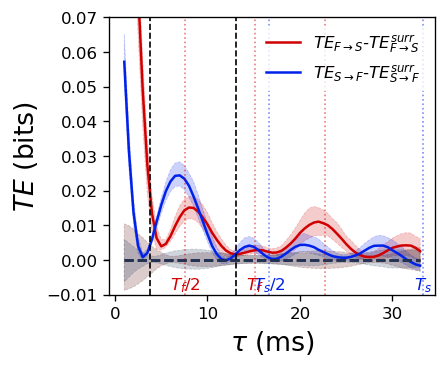

In [992]:
yl = (-0.01, 0.07)
opt = dict(linestyle="--", linewidth=1)

_pi = np.pi
trad = [f/(2*_pi) for f in visu.fpeaks[cid-1]]


# tphi = [_pi/4 * trad[0]]
tphi = [_pi/4 * trad[0], 7/8*_pi * trad[0]]

fig = visu.show_te_summary(te_data, yl=yl, subtract_surr=True)
visu.draw_freq_indicator(cid, yl)

for tp in tphi:
    plt.vlines(tp, yl[0], yl[1], color='k', linestyle='--', linewidth=1)

plt.show()

In [993]:
cid, wid = 8, 15

fp = visu.fpeaks[cid-1][0]
fp = max(fp, 30)
tp = 1e3/fp
te_data_2d = utils.load_pickle("./data/te_2d_mua/te_%d%02d.pkl"%(cid, wid))
te_data = utils.reduce_te_2d(te_data_2d, tcut=tp)

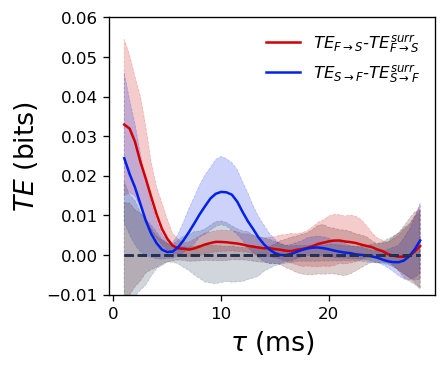

In [994]:
yl = (-0.01, 0.06)
opt = dict(linestyle="--", linewidth=1)

fig = visu.show_te_summary(te_data, yl=yl, subtract_surr=True)
# plt.vlines(, yl[0], yl[1], **opt)
# plt.vlines(32, yl[0], yl[1], **opt)
# plt.vlines(34, yl[0], yl[1], **opt)
# plt.vlines(14.5, yl[0], yl[1], **opt)

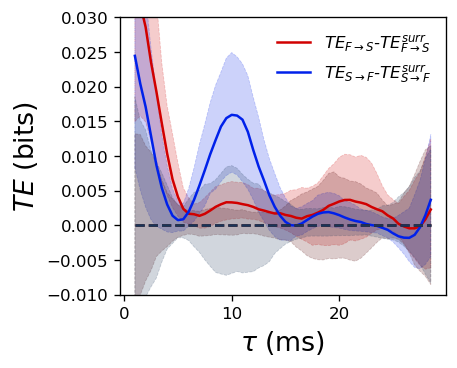

In [995]:
yl = (-0.01, 0.03)
opt = dict(linestyle="--", linewidth=1)

fig = visu.show_te_summary(te_data, yl=yl, subtract_surr=True)

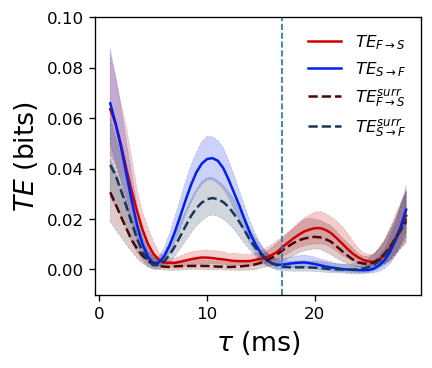

In [996]:
yl = (-0.01, 0.1)
opt = dict(linestyle="--", linewidth=1)

fig = visu.show_te_summary(te_data, yl=yl)
plt.vlines(17, yl[0], yl[1], **opt)
# plt.vlines(32, yl[0], yl[1], **opt)
# plt.vlines(34, yl[0], yl[1], **opt)
# plt.vlines(14.5, yl[0], yl[1], **opt)

## Extract all figures

In [997]:
od.get_motif_labels()[15]

'F(fs)S(fs)'

In [998]:
orders = [0, 2, 10, 6, 14, 4, 5, 7, 15, 8, 13]

def gen_background(dpi=200):
    
    we = 0.01
    wc = 0.025
    wl = 0.01
    num_c = 8

    fig = plt.figure(figsize=(16, 9), dpi=dpi)

    # boundaries
    w = 1 - we*2 - wc
    h = 1 - (we + wc)
    dw = w / len(orders)

    for n in range(len(orders)):
        plt.axes(position=(we+wc+dw*n, h, dw, wc))
        lb = od.get_motif_labels()[orders[n]]
        plt.text(0.5, 0.5, lb, va="center", ha="center", fontsize=12)
        plt.xticks([])
        plt.yticks([])

    # h = 1 - (2*we + wc)
    dh = (h - we) / num_c
    for n in range(num_c):
        # plt.axes(position=(we, 1-we-wc-dh*(n+1), wc, dh))
        plt.axes(position=(we, 1-we-wc-dh*(n+1), wc, dh))
        lb = "%d"%(n+1)
        plt.text(0.5, 0.5, lb, va="center", ha="center", fontsize=16)
        plt.xticks([])
        plt.yticks([])

    # generate axis
    wtot = 1 - 2*we - wc
    htot = 1 - 2*we - wc

    dw = wtot/len(orders)
    dh = htot/num_c
    
    coords = []

    for nc in range(num_c):
        coords.append([])
        h0 = 1 - we - wc - dh*(nc+1)
        for i in range(len(orders)):
            w0 = we + wc + dw*i

            plt.axes(position=(w0, h0, dw, dh))
            plt.xticks([]); plt.yticks([])
            
            coords[-1].append((w0, h0, dw, dh))

            # plt.axes(position=(w0+wl, h0+wl, dw-2*wl, dh-2*wl))
            
    return fig, coords




In [41]:
!mkdir figs/te_naive_1

In [47]:
reload(utils)

<module 'utils' from '/home/jungyoung/Project/hh_neuralnet/information_routing/utils.py'>

In [50]:
te_data_2d = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(1, 0)))
te_data = utils.reduce_te_2d(te_data_2d)

In [52]:
te_data["te"].shape, te_data["te_surr"].shape

((200, 2, 79), (200, 2, 79))

/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py:73: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.xlabel(xlb, fontsize=16)


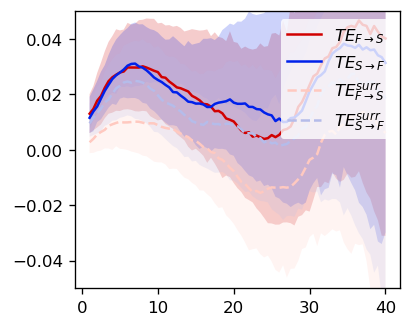

In [73]:
fig = visu.show_te_summary(te_data, yl=yl_set[0], xlb=None, ylb=None)

In [429]:
! mkdir figs/te_2d_mua_reduce

In [437]:
reload(visu)

<module 'visu' from '/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py'>

# Compute TE for total samples

In [166]:
import os
from tqdm import tqdm

# Parameter setting

cw_pair = [
    [1, 0], [1, 2], [1, 4], [1, 6],
    [2, 0], [2, 2], [2, 8], [2, 10],
    [3, 0], [3, 2], [3, 4], [3, 6],
    [4, 0], [4, 2], [4, 5], [4, 7],
    [5, 0], [5, 4], [5, 10], [5, 14],
    [6, 0], [6, 4], [6, 10], [6, 14],
    [7, 0], [7, 10],
    [8, 0], [8, 2], [8, 13], [8, 15]
]

orders = [0, 2, 10, 6, 14, 4, 5, 7, 15, 8, 13]


tcut = 1e3/np.array(visu.fpeaks)[:, 0]
tcut[tcut < 0] = 30

In [554]:
reload(visu)

<module 'visu' from '/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py'>

In [ ]:
data_dir = "./data/te_2d_mua_2/"
fdir = "./figs/te_2d_mua_reduce_2/"

xl_fit = [5, 41]
# xl_show = [0, 41]

yl_set = [[0, 0], [0, 0]]
cid_prv = 1
wid_prv_set = []
for cid, wid in tqdm(cw_pair + [[-1, -1]]):
    # cumulate figs and set ylim
    if cid != cid_prv:
        for wid_prv in wid_prv_set:
            
            xl_show = [0, tcut[cid_prv-1]]
            
            te_data_2d = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid_prv, wid_prv)))
            te_data = utils.reduce_te_2d(te_data_2d, tcut=tcut[cid_prv-1])
            # te_data = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid_prv, wid_prv)))
            
            nc = cid_prv-1
            nw = orders.index(wid_prv)
            
            fig = visu.show_te_summary(te_data, yl=yl_set[0], xlb=None, ylb=None, xl=xl_show)
            visu.draw_freq_indicator(cid_prv, yl=yl_set[0])
            # visu.draw_cfc_indicator(cid_prv, yl=yl_set[0])
            # visu.draw_syn_indicator(yl_set[0])
            
            plt.savefig(os.path.join(fdir, "te_%d%02d.png"%(cid_prv, wid_prv)), bbox_inches="tight")
            plt.clf()
            
            fig = visu.show_te_summary(te_data, yl=yl_set[1], subtract_surr=True, xlb=None, ylb=None, xl=xl_show)
            visu.draw_freq_indicator(cid_prv, yl=yl_set[1])
            # visu.draw_cfc_indicator(cid_prv, yl=yl_set[1])
            # visu.draw_syn_indicator(yl_set[1])
            plt.savefig(os.path.join(fdir, "te_subt_%d%02d.png"%(cid_prv, wid_prv)), bbox_inches="tight")
            plt.clf()
            
        wid_prv_set = []
        cid_prv = cid
        yl_set = [[0, 0], [0, 0]]
        
    if cid == -1: continue

    te_data_2d = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid, wid)))
    te_data = utils.reduce_te_2d(te_data_2d, tcut=tcut[cid-1])
    # te_data = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid, wid)))
    
    fig = visu.show_te_summary(te_data, xl=xl_fit)
    yl = fig.gca().get_ylim()
    if yl[0] < yl_set[0][0]: yl_set[0][0] = yl[0]
    if yl[1] > yl_set[0][1]: yl_set[0][1] = yl[1]
    fig.clf()
    
    fig = visu.show_te_summary(te_data, subtract_surr=True, xl=xl_fit)
    yl = fig.gca().get_ylim()
    if yl[0] < yl_set[1][0]: yl_set[1][0] = yl[0]
    if yl[1] > yl_set[1][1]: yl_set[1][1] = yl[1]
    fig.clf()
    
    plt.close()
    wid_prv_set.append(wid)
    
# fig_bck.show()
# plt.close()

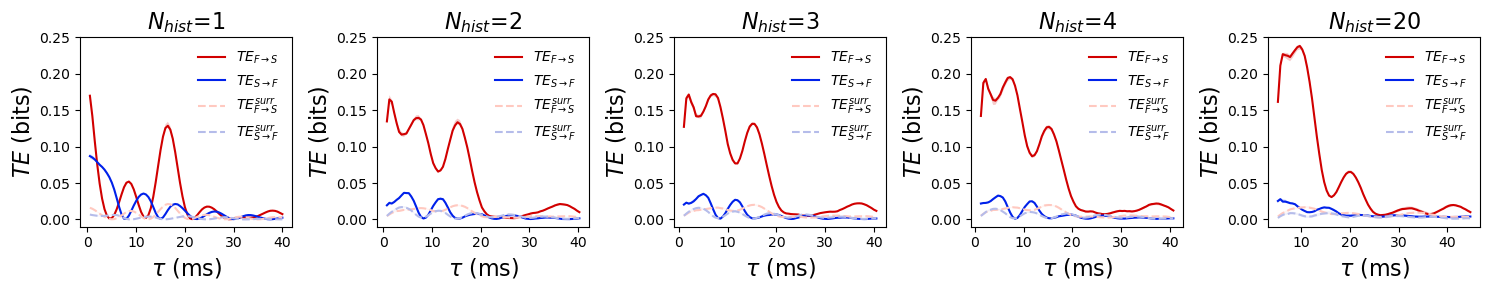

In [106]:
num_pt = [1, 2, 3, 4, 20]
plt.figure(figsize=(15, 3))
for n in range(5):
    
    te_data = utils.load_pickle("./te_multi_hist/te_510(%d).pkl"%(num_pt[n]))
    
    plt.subplot(1,5,n+1)
    fig = visu.show_te_summary(te_data, figsize=None, yl=(-0.01, 0.25), title=r"$N_{hist}$=%d"%(num_pt[n]))

plt.tight_layout()
plt.show()

## combine figures

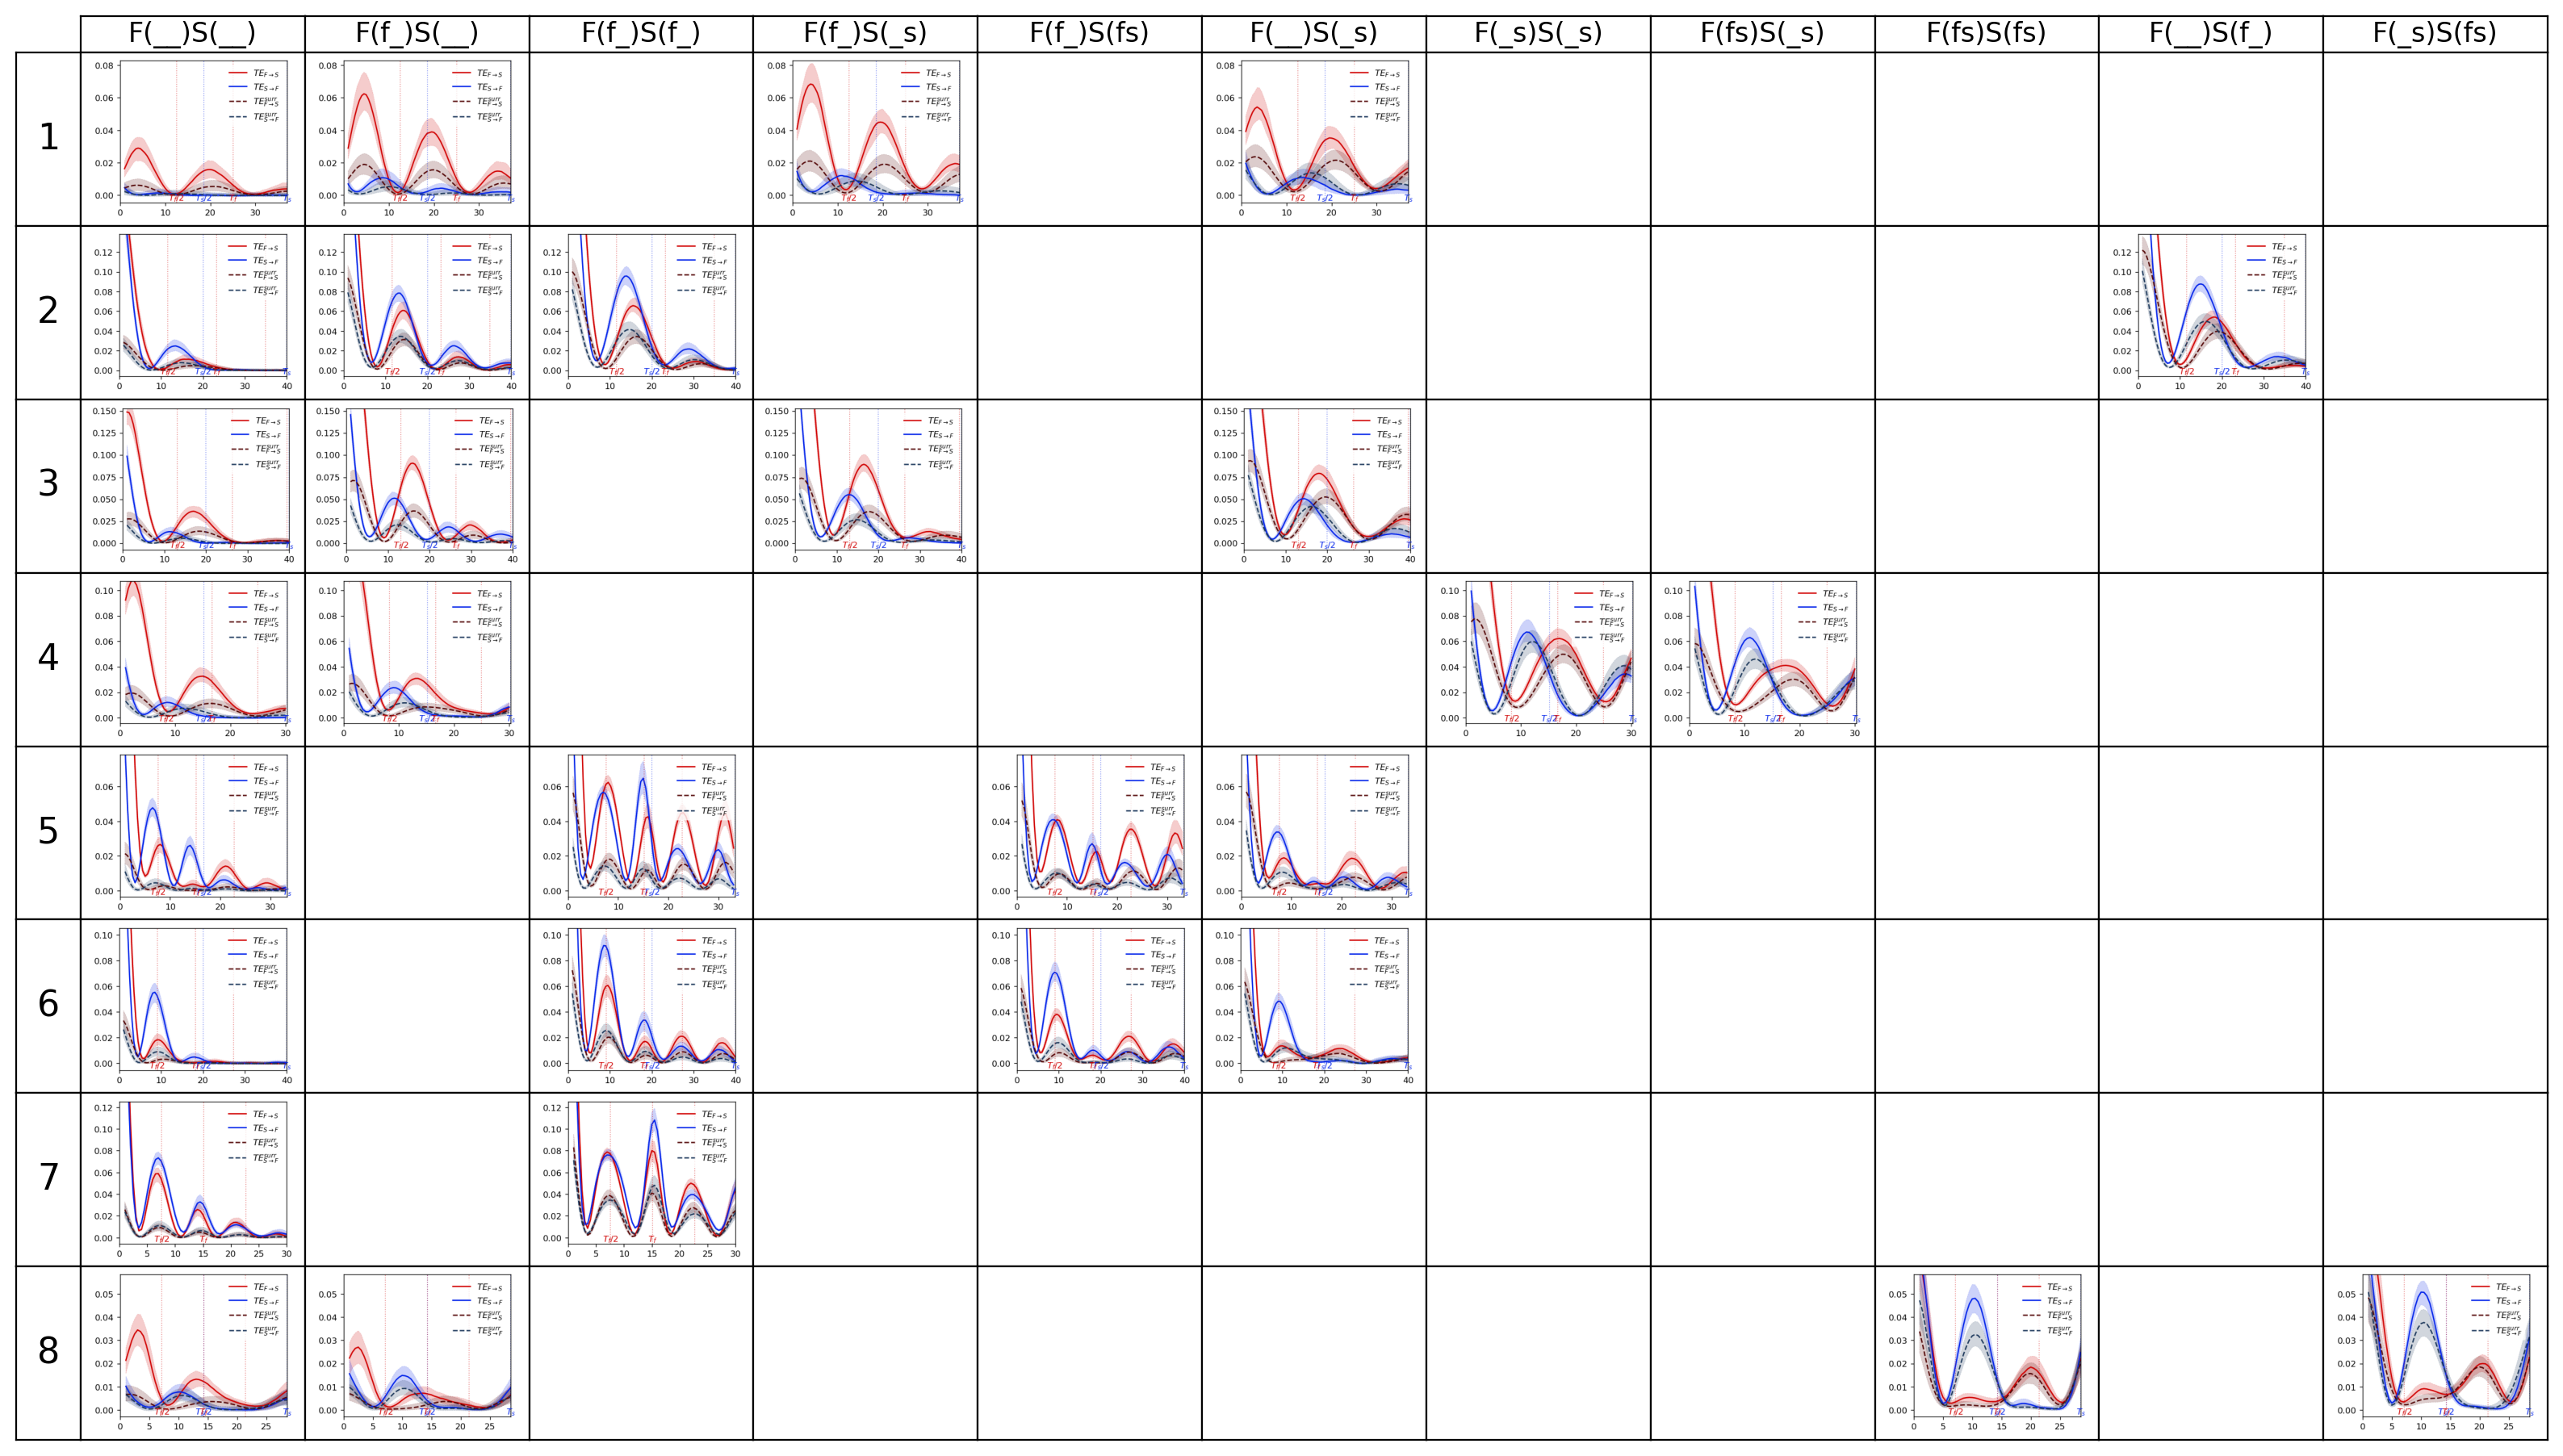

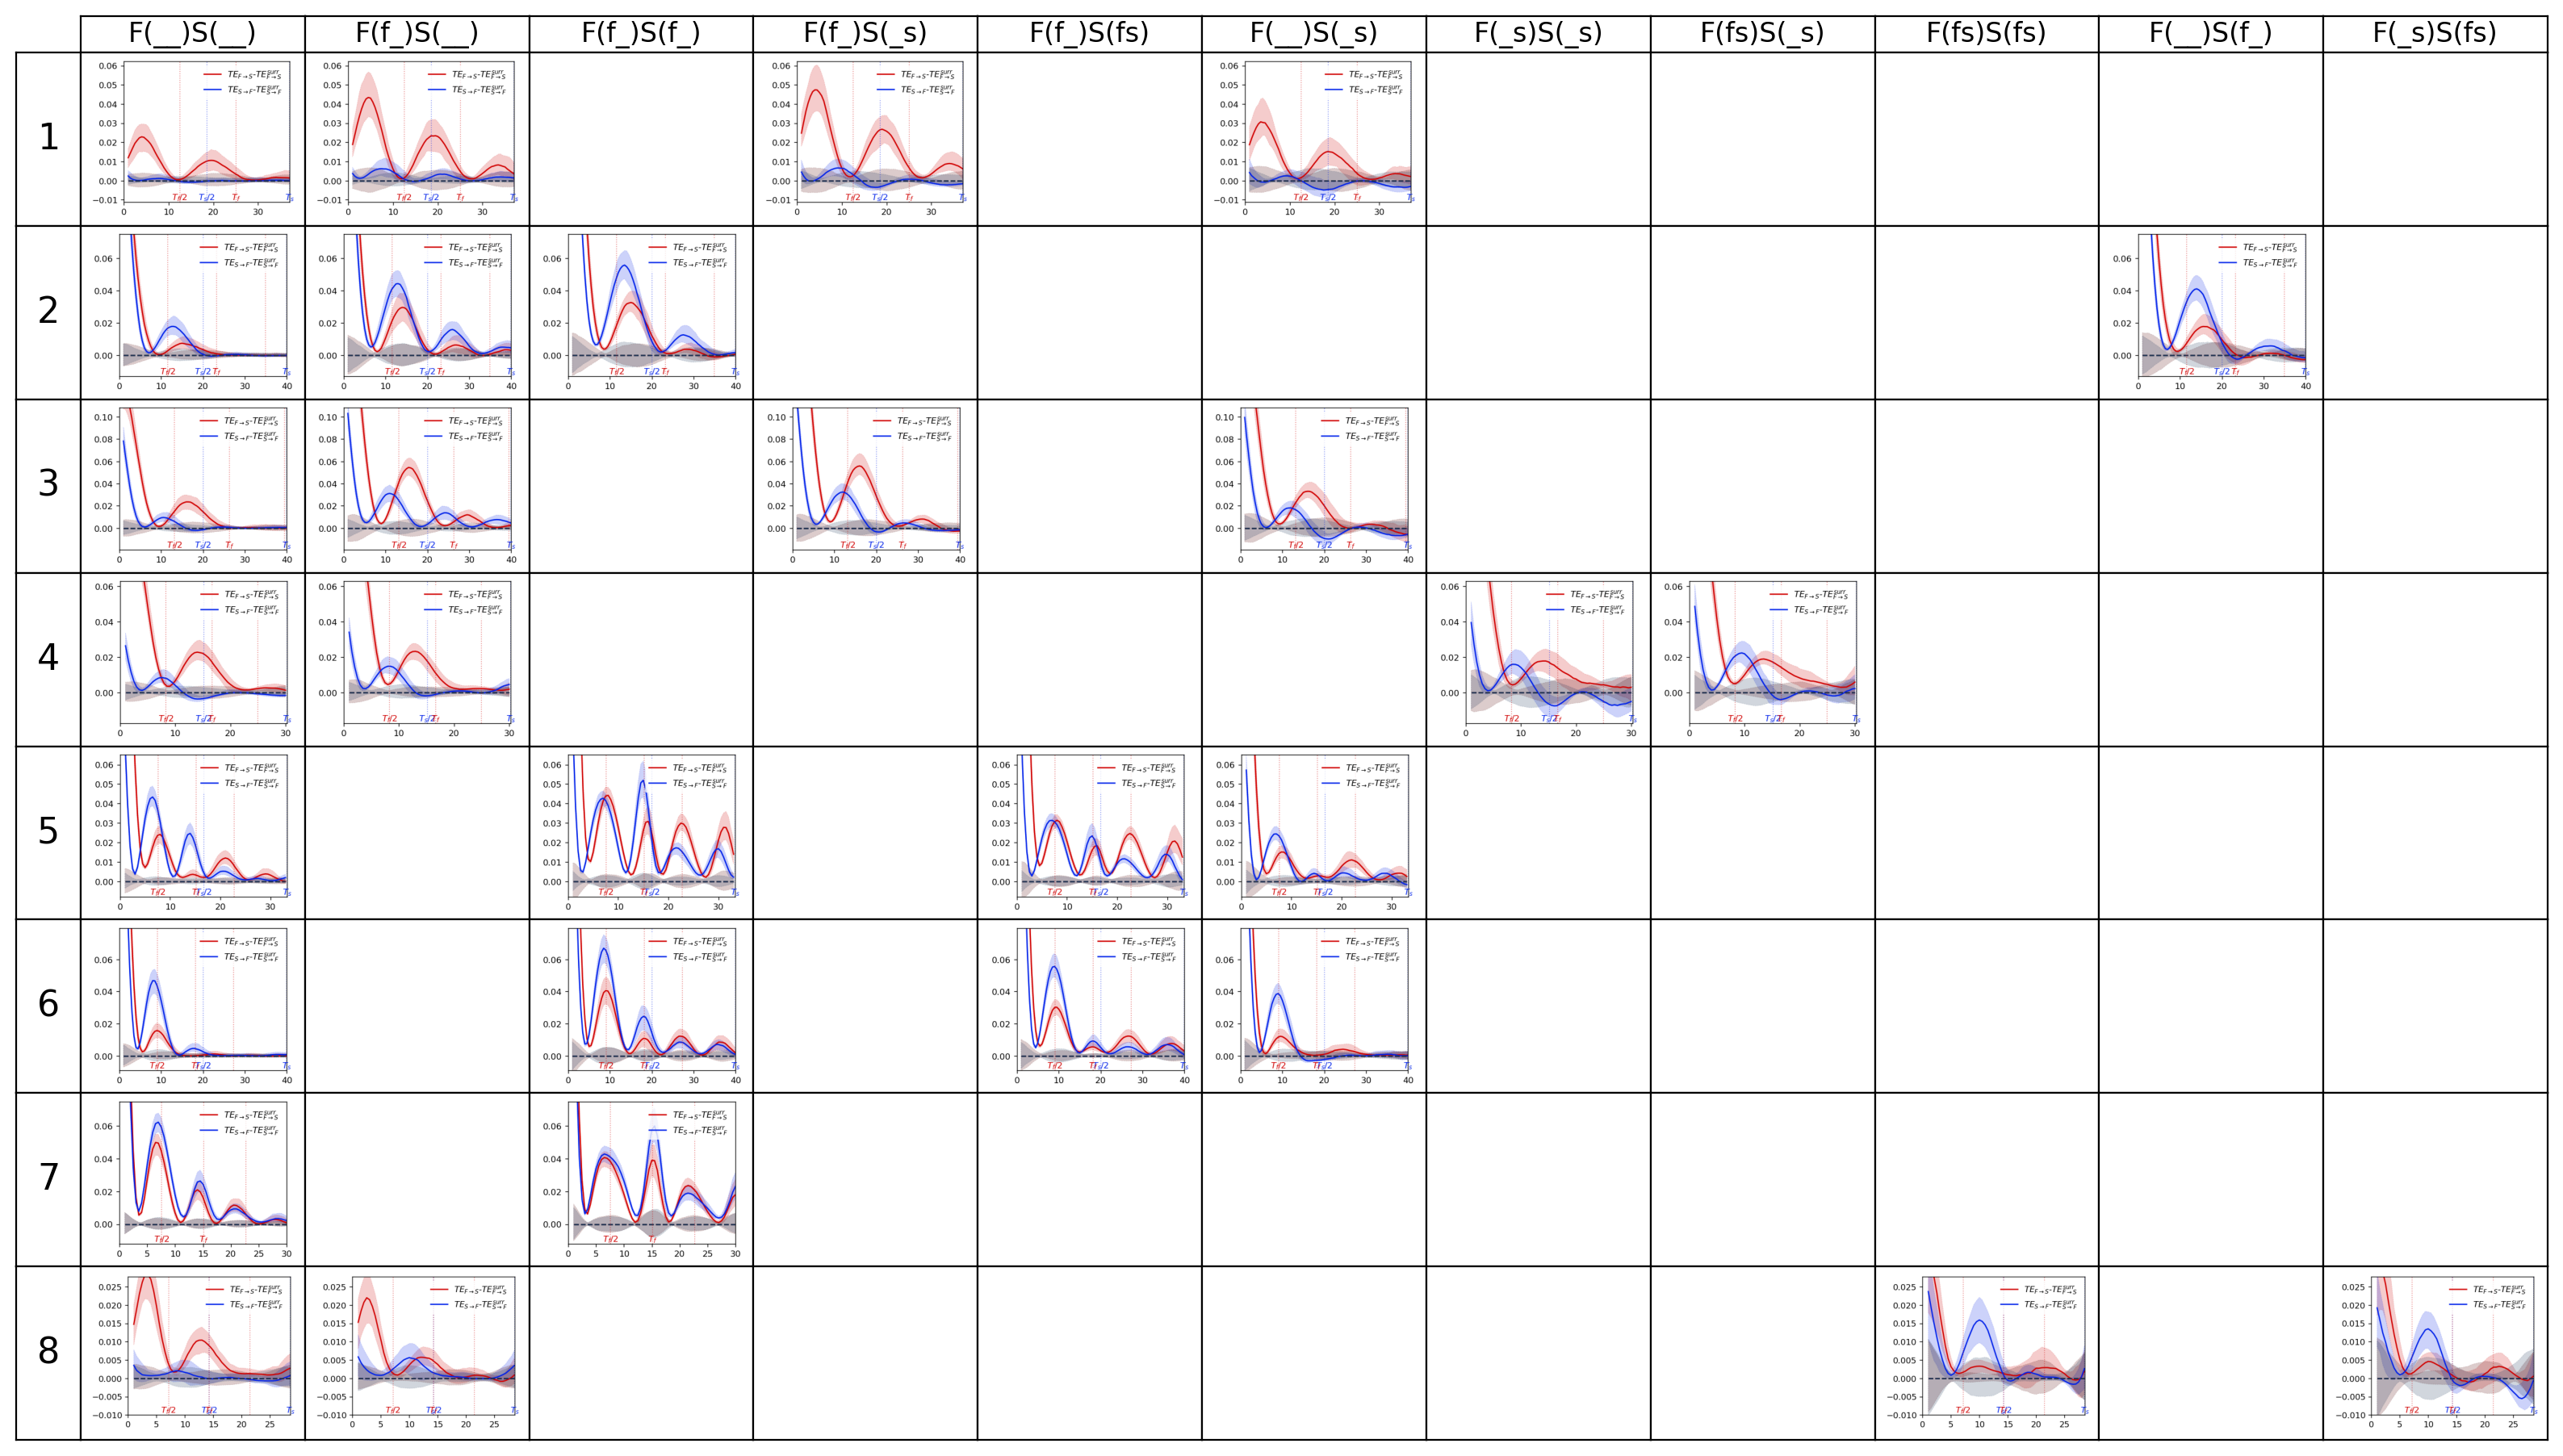

In [933]:
def gen_background(dpi=200):
    
    we = 0.01
    wc = 0.025
    wl = 0.01
    num_c = 8

    fig = plt.figure(figsize=(16, 9), dpi=dpi)

    # boundaries
    w = 1 - we*2 - wc
    h = 1 - (we + wc)
    dw = w / len(orders)

    for n in range(len(orders)):
        plt.axes(position=(we+wc+dw*n, h, dw, wc))
        lb = od.get_motif_labels()[orders[n]]
        plt.text(0.5, 0.5, lb, va="center", ha="center", fontsize=12)
        plt.xticks([])
        plt.yticks([])

    # h = 1 - (2*we + wc)
    dh = (h - we) / num_c
    for n in range(num_c):
        # plt.axes(position=(we, 1-we-wc-dh*(n+1), wc, dh))
        plt.axes(position=(we, 1-we-wc-dh*(n+1), wc, dh))
        lb = "%d"%(n+1)
        plt.text(0.5, 0.5, lb, va="center", ha="center", fontsize=16)
        plt.xticks([])
        plt.yticks([])

    # generate axis
    wtot = 1 - 2*we - wc
    htot = 1 - 2*we - wc

    dw = wtot/len(orders)
    dh = htot/num_c
    
    coords = []

    for nc in range(num_c):
        coords.append([])
        h0 = 1 - we - wc - dh*(nc+1)
        for i in range(len(orders)):
            w0 = we + wc + dw*i

            plt.axes(position=(w0, h0, dw, dh))
            plt.xticks([]); plt.yticks([])
            
            coords[-1].append((w0, h0, dw, dh))

            # plt.axes(position=(w0+wl, h0+wl, dw-2*wl, dh-2*wl))
            
    return fig, coords



fig_dir = "./figs/te_2d_mua_reduce_2/"

for tag in ("", "_subt"):
    # wl = 0.002

    fig_bck, coords = gen_background()
    for cid, wid in cw_pair:
        nc = cid-1
        nw = orders.index(wid)

        fname = os.path.join(fig_dir, "te%s_%d%02d.png"%(tag, cid, wid))
        im_te = Image.open(fname)

        c = coords[nc][nw]
        fig_bck.add_axes([c[0]+wl, c[1]+wl, c[2]-2*wl, c[3]-2*wl])
        plt.sca(fig_bck.axes[-1])
        plt.imshow(im_te)
        plt.axis("off")

    plt.savefig(os.path.join(fig_dir, "summary%s.png"%(tag)), dpi=400, bbox_inches="tight")

# Spectral characteristics

In [ ]:
import os
from tqdm import tqdm

cw_pair = [
    [1, 0], [1, 2], [1, 4], [1, 6],
    [2, 0], [2, 2], [2, 8], [2, 10],
    [3, 0], [3, 2], [3, 4], [3, 6],
    [4, 0], [4, 2], [4, 5], [4, 7],
    [5, 0], [5, 4], [5, 10], [5, 14],
    [6, 0], [6, 4], [6, 10], [6, 14],
    [7, 0], [7, 10],
    [8, 0], [8, 2], [8, 13], [8, 15]
]

# fig_bck, coords = gen_background()
wl = 0.01

data_dir = "./data/spec"
fdir = "./figs/spec"

xl_fit = [5, 80]
xl_show = [5, 80]

yl_set = [[0, 0], [0, 0]]
cid_prv = 1
wid_prv_set = []
for cid, wid in tqdm(cw_pair + [[-1, -1]]):
    # cumulate figs and set ylim
    if cid != cid_prv:
        for wid_prv in wid_prv_set:
            
            # te_data = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid_prv, wid_prv)))
            
            spec_data = utils.load_pickle(os.path.join(data_dir, "spec_%d%02d.pkl"%(cid_prv, wid_prv)))
            
            nc = cid_prv-1
            nw = orders.index(wid_prv)
            c = coords[nc][nw]
            
            fig = visu.show_spec_summary(spec_data, yl=yl_set[0], xlb=None, ylb=None, xl=xl_show)
            plt.savefig(os.path.join(fdir, "spec_%d%02d.png"%(cid_prv, wid_prv)), bbox_inches="tight")
            plt.clf()
            
        wid_prv_set = []
        cid_prv = cid
        yl_set = [[0, 0], [0, 0]]
        
    if cid == -1: continue
    
    spec_data = utils.load_pickle(os.path.join(data_dir, "spec_%d%02d.pkl"%(cid, wid)))
    
    fig = visu.show_spec_summary(spec_data, xl=xl_fit)
    yl = fig.gca().get_ylim()
    if yl[0] < yl_set[0][0]: yl_set[0][0] = yl[0]
    if yl[1] > yl_set[0][1]: yl_set[0][1] = yl[1]
    fig.clf()
    
    wid_prv_set.append(wid)
    
fig_bck.show()

plt.clf()

In [ ]:
fig_dir = "./figs/spec/"
tag = ""

wl = 0.002

fig_bck, coords = gen_background()
for cid, wid in cw_pair:
    nc = cid-1
    nw = orders.index(wid)
    
    fname = os.path.join(fig_dir, "spec_%d%02d.png"%(cid, wid))
    im_te = Image.open(fname)
    
    c = coords[nc][nw]
    fig_bck.add_axes([c[0]+wl, c[1]+wl, c[2]-2*wl, c[3]-2*wl])
    plt.sca(fig_bck.axes[-1])
    plt.imshow(im_te)
    plt.axis("off")
    
plt.savefig(os.path.join(fig_dir, "summary.png"), dpi=400, bbox_inches="tight")

In [396]:
fpeaks = [[27, 40],
          [25, 43],
          [25, 38],
          [33, 60],
          [30, 66],
          [25, 55],
          [-1, 66],
          [35, 70]]

In [380]:
cid = 3

wid = 0

spec_data = utils.load_pickle("./data/spec/spec_%d%02d.pkl"%(cid, wid))
te_data_2d = utils.load_pickle("./data/te_2d/te_%d%02d.pkl"%(cid, wid))
te_data = utils.reduce_te_2d(te_data_2d)

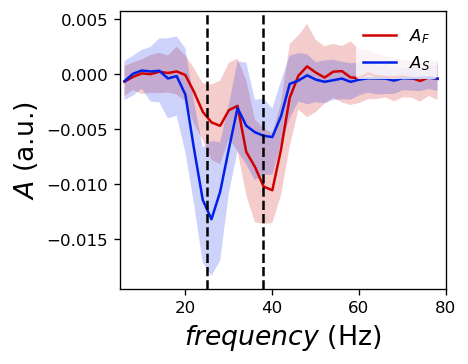

In [381]:
fig = visu.show_spec_summary(spec_data, xl=(5, 80))
yl = fig.gca().get_ylim()

for f0 in fpeaks[cid-1]:
    plt.vlines(f0, yl[0], yl[1], color='k', linestyle='--')

plt.ylim(yl)
plt.show()

In [414]:
reload(visu)

<module 'visu' from '/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py'>

In [382]:
te_data_2d = utils.load_pickle("./data/te_2d/te_%d%02d.pkl"%(cid, wid))
te_data = utils.reduce_te_2d(te_data_2d)

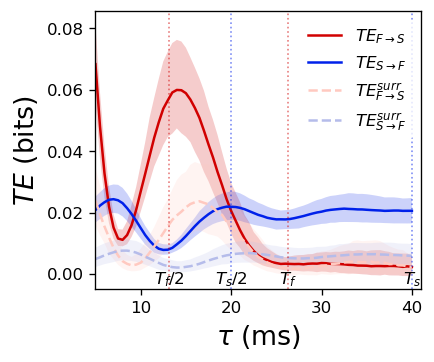

In [415]:
fig = visu.show_te_summary(te_data, xl=(5, 41))
yl = fig.gca().get_ylim()
visu.draw_freq_indicator(cid, yl)

# for i in range(2):
# plt.vlines(1e3/fpeaks[cid-1][0], yl[0], yl[1], color='k', linestyle='--')
# plt.vlines(1e3/fpeaks[cid-1][0]/2, yl[0], yl[1], color='k', linestyle='--')

# plt.vlines(1e3/fpeaks[cid-1][1], yl[0], yl[1], color='k', linestyle='--')
# plt.vlines(1e3/fpeaks[cid-1][1]/2, yl[0], yl[1], color='k', linestyle='--')

# for f0 in fpeaks[cid-1]:
    # plt.vlines(1e3/f0, yl[0], yl[1], color='k', linestyle='--')


In [412]:


def draw_freq_indicator(cid, yl=None):
    if yl is None: yl = [0, 1]
    
    fopt = dict(va="center", ha="center", fontsize=10)
    lopt = dict(linestyle=":", linewidth=1, alpha=0.5)
    tp_labels = [r"$T_s/2$", r"$T_s$", r"$T_f/2$", r"$T_f$"]
    
    for tp in range(2):
        f0 = fpeaks[cid-1][tp]
        plt.vlines(1e3/f0, yl[0], yl[1], color=cs[1-tp], **lopt)
        plt.vlines(1e3/f0/2, yl[0], yl[1], color=cs[1-tp], **lopt)
        
        h = yl[0] + (yl[1]-yl[0])/30
        plt.text(1e3/f0/2, h, tp_labels[2*tp], **fopt)
        plt.text(1e3/f0, h, tp_labels[2*tp+1], **fopt)

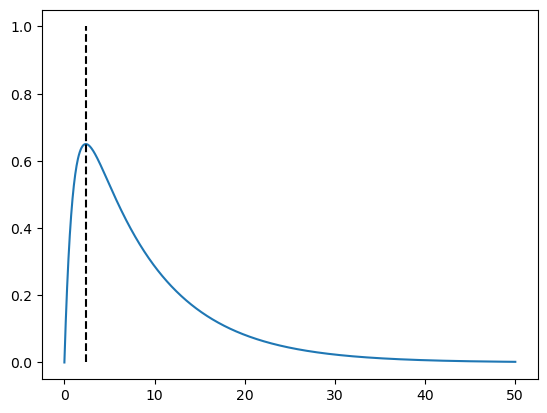

In [448]:
tau2 = 1
tau1 = 8
tp = tau1*tau2 / (tau2 - tau1) * np.log(tau2/tau1)

t = np.linspace(0, 50, 1000)
g = (np.exp(-t/tau1) - np.exp(-t/tau2))

plt.plot(t, g)
plt.vlines(tp, 0, 1, color='k', linestyle="--")
plt.show()

In [465]:
reload(visu)

<module 'visu' from '/home/jungyoung/Project/hh_neuralnet/information_routing/visu.py'>

0.5159883447111155
1.0058986952713127
2.3765046190626693


(0.0, 40.0)

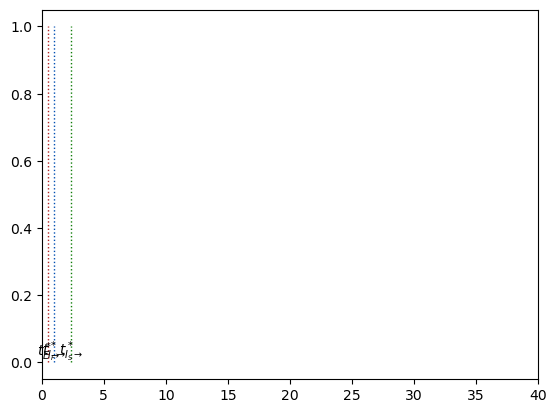

In [467]:
visu.draw_syn_indicator()
plt.xlim([0, 40])

## Degree of boosting

In [575]:
cw_pair = [
    [1, 0], [1, 2], [1, 4], [1, 6],
    [2, 0], [2, 2], [2, 8], [2, 10],
    [3, 0], [3, 2], [3, 4], [3, 6],
    [4, 0], [4, 2], [4, 5], [4, 7],
    [5, 0], [5, 4], [5, 10], [5, 14],
    [6, 0], [6, 4], [6, 10], [6, 14],
    [7, 0], [7, 10],
    [8, 0], [8, 2], [8, 13], [8, 15]
]

In [577]:
te_data["te"].shape

(200, 2, 79)

In [586]:
def compute_boost(x, xbase):
    xs = np.sum(x)
    xbs = np.sum(xbase)
#     return np.sum((x - xbase) / xbase) * 100
    return (xs - xbs) / xbs * 100


for cid, wid in cw_pair:
    if wid == 0: continue
    te_data_2d = utils.load_pickle("./data/te_2d/te_%d%02d.pkl"%(cid, wid))
    te_data = utils.reduce_te_2d(te_data_2d)
    
    te_data_2d_base = utils.load_pickle("./data/te_2d/te_%d00.pkl"%(cid))
    te_data_base = utils.reduce_te_2d(te_data_2d_base)
    
    te = te_data["te"].mean(axis=0)
    te_surr = te_data["te_surr"].mean(axis=0)
    te_base = te_data_base["te"].mean(axis=0)
    
    tag = od.get_motif_labels()[wid]
    print("%s: TE_surr; F->S: %5.2f / S->F: %5.2f, TE_base; F->S: %5.2f / S->F: %5.2f"%(tag, 
                                                                                        compute_boost(te[0], te_surr[0]),
                                                                                        compute_boost(te[1], te_surr[1]),
                                                                                        compute_boost(te[0], te_base[0]),
                                                                                        compute_boost(te[1], te_base[1])))
    
    
    break
    
    
    
    # print("%s: 
    
    

F(f_)S(__): TE_surr; F->S: 136.16 / S->F: 118.37, TE_base; F->S: 131.87 / S->F: 347.73


In [584]:
np.sum((te[0] - te_base[0])/te_base[0])

129.87496576826436

In [ ]:
nid = 1

plt.plot(te[nid])
plt.plot(te_surr[nid])
plt.plot(te_base[nid])

In [585]:
(np.sum(te[0]) - np.sum(te_base[0])) / np.sum(te_base[0])

1.3186587895224473

# Compute TE for total samples